### L1 & L2 Regulariztion

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [65]:
dataset = pd.read_csv("Houseprice.csv")
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [66]:
dataset.shape

(4600, 18)

In [67]:
dataset.drop(columns=["date","street","city","statezip","country"], inplace= True)

In [68]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [69]:
#adding the price column to the end
price = dataset.pop('price')
dataset['price'] = price
dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


In [70]:
dataset.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


#### let's check if we can apply linear regression or not, to know that we find the correlation. If the data are highly correalted we can use linear regression.


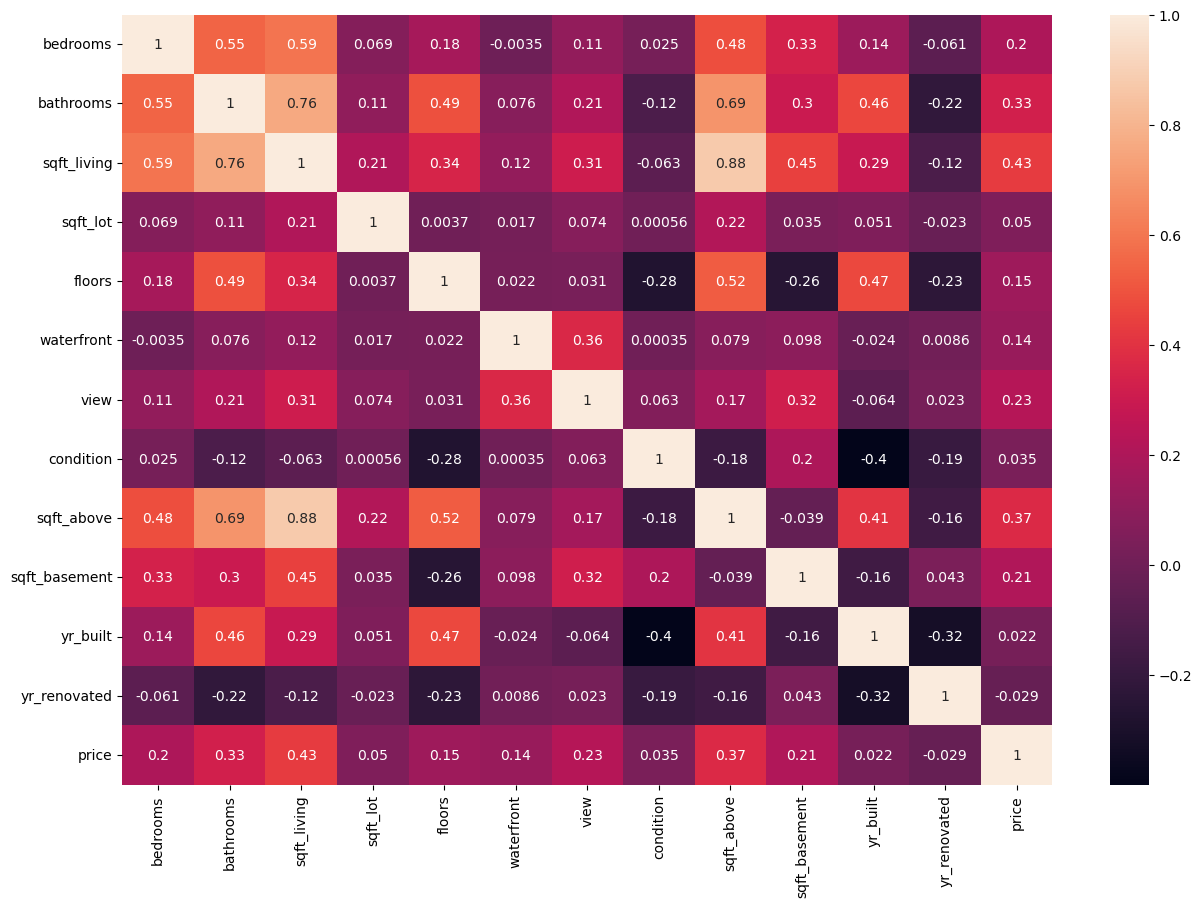

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(data=dataset.corr(), annot =True)
plt.show()

We check the correlation of all feature with the price as the price is the outcome. We can see it is not correlated. We would not use linear regression in such cases generally. But for now we are doing it anyways. 

In [72]:
x = dataset.iloc[:,:-1]
y = dataset["price"]

In [73]:
# scaling the data using StandardScaler
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns) 
# x was just an array so converting it to a DataFrame.
# columns = x.columns says that the new Dataframe has the column name as the previous column names from x

In [74]:
# Once the scaling is done, now we split the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [75]:
#importing LinearRegression, lasso and Ridge all 
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### Using Linear Regression

In [76]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)*100 #very poor accuracy; we could have guessed as we did not see any good correlation earlier

3.228385663277078

In [77]:
lr.coef_

array([-58612.02450797,  28620.9187631 , 137630.25418366, -18457.45554177,
        37581.7604078 ,  32277.52943857,  34834.37139813,  19864.74096026,
       120697.0887004 ,  61415.30012402, -76377.6773788 ,   8089.00372636])

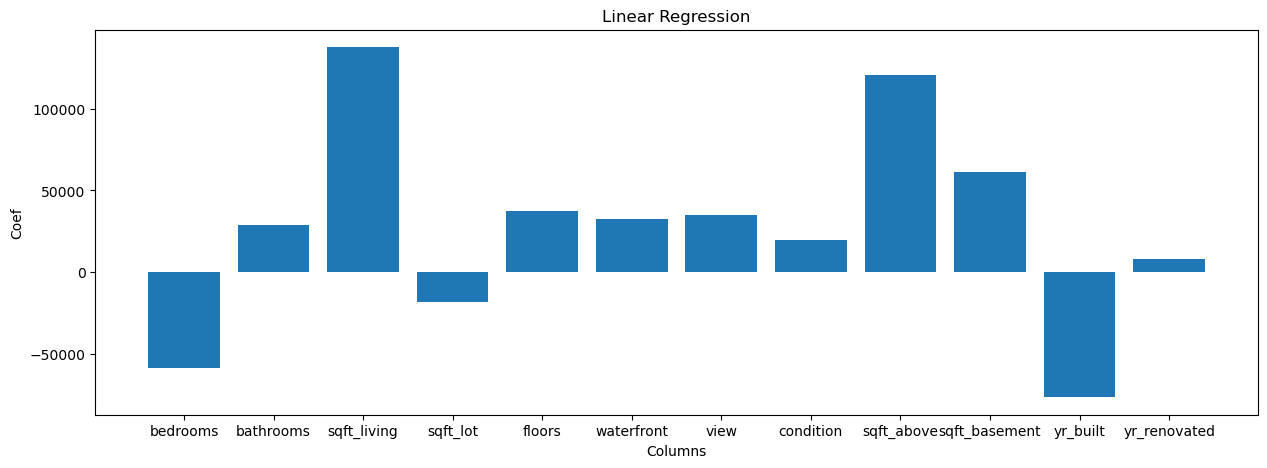

In [78]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, lr.coef_) #(x,y) x is all the columns of x and y is the value of the coefficients
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

### Using Lasso Regression (L1 Regularization)
- Used for feature selection

In [93]:
la = Lasso(alpha=0.01) #alpha is the penalty value
la.fit(x_train, y_train)
la.score(x_test, y_test)*100

/opt/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


3.2283851776121364

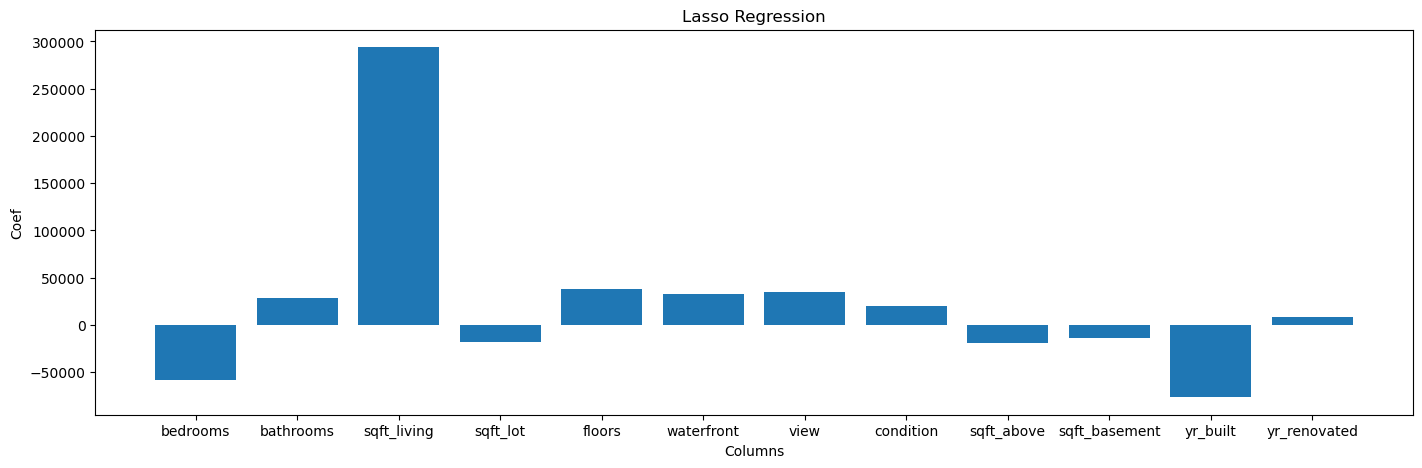

In [94]:
plt.figure(figsize=(17,5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso Regression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

### Using Ridge Regularization
- Best for avoiding overfiting

In [96]:
ri = Ridge(alpha=10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)*100

3.240199417134748

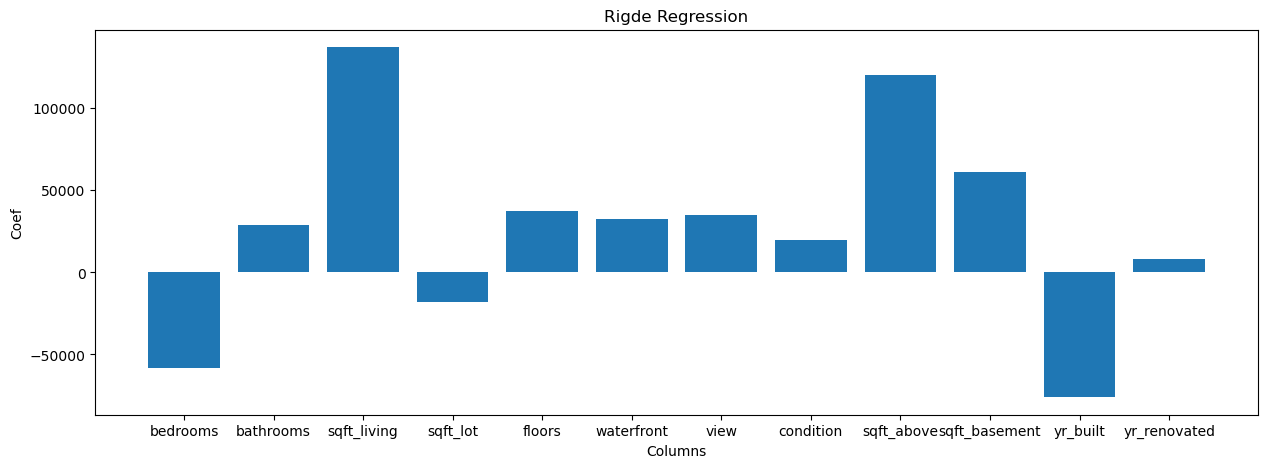

In [97]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, ri.coef_)
plt.title("Rigde Regression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

### Find the errors in these models to know which one of these is better

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np #for root mean absolute error

In [102]:
#MSE, MAE, RMSE for LR
MSE_LR = mean_squared_error(y_test, lr.predict(x_test)) # takes (y_true and y_pred). Our y_true is what we got for the y_test and y_predict is prediction on our x_test
MAE_LR = mean_absolute_error(y_test, lr.predict(x_test))
RMSE_LR = np.sqrt(MSE_LR)
MSE_LR, MAE_LR, RMSE_LR

(986921767056.1313, 210908.1732501152, np.float64(993439.3625461654))

In [104]:
#MSE, MAE, RMSE for LA
MSE_LA = mean_squared_error(y_test, la.predict(x_test)) # takes (y_true and y_pred). Our y_true is what we got for the y_test and y_predict is prediction on our x_test
MAE_LA = mean_absolute_error(y_test, la.predict(x_test))
RMSE_LA = np.sqrt(MSE_LA)
MSE_LA, MAE_LA, RMSE_LA

(986921772009.1675, 210908.1744759197, np.float64(993439.3650390382))

In [106]:
#MSE, MAE, RMSE for RI
MSE_RI = mean_squared_error(y_test, ri.predict(x_test)) # takes (y_true and y_pred). Our y_true is what we got for the y_test and y_predict is prediction on our x_test
MAE_RI = mean_absolute_error(y_test, ri.predict(x_test))
RMSE_RI = np.sqrt(MSE_RI)
MSE_RI, MAE_RI, RMSE_RI

(986801284919.7871, 210815.94787385664, np.float64(993378.7217973752))

### We can see that all of them have almost same error. So if we really had to pick one, we would pick Ridge as earlier we saw that the accuracy for Ridge was abit better (even in points) i.e. 3.24

### Comparing the Coefficients

In [112]:
df = pd.DataFrame({"col_name": x.columns, "LinearRegression": lr.coef_, "Lasso": la.coef_, "Ridge": ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-58612.024508,-58612.012069,-58006.052993
1,bathrooms,28620.918763,28620.851521,28878.686087
2,sqft_living,137630.254184,293862.914857,137085.109644
3,sqft_lot,-18457.455542,-18457.444078,-18298.877275
4,floors,37581.760408,37581.763676,37445.130830
5,waterfront,32277.529439,32277.522911,32264.182806
6,view,34834.371398,34834.367544,34968.321859
7,condition,19864.740960,19864.724543,19870.905664
8,sqft_above,120697.088700,-19147.129423,120223.632684
9,sqft_basement,61415.300124,-13867.961864,61163.461025
